## Decision Tree scratch Implementation

*Problem* : **Titanic Survior Prediction** Kaggle Challenge
### Learning Goals
- How to pre-process data? 
    - Dropping not useful features
    - Filling the missing values (Data Imputation)
    
- Creating a Binary Decision Tree from Scratch


### Step1: Load Dataset and analyse it

In [1]:
import numpy as np
import pandas as pd
data=pd.read_csv("titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Step2: Data cleaning and fill NaN values

In [3]:
columns_to_drop=["PassengerId","Name","Ticket","Cabin","Embarked"]
data_clean=data.drop(columns_to_drop,axis=1)
data_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data_clean["Sex"]=le.fit_transform(data_clean["Sex"])

In [5]:
print(data_clean.head())
print(data_clean.info())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare
0         0       3    1  22.0      1      0   7.2500
1         1       1    0  38.0      1      0  71.2833
2         1       3    0  26.0      0      0   7.9250
3         1       1    0  35.0      1      0  53.1000
4         0       3    1  35.0      0      0   8.0500
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(5)
memory usage: 48.8 KB
None


In [6]:
#fill Nan values
data_clean=data_clean.fillna(data_clean["Age"].mean())

In [7]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(5)
memory usage: 48.8 KB


In [8]:
#how to access a dataframe row
data_clean.loc[2]

Survived     1.000
Pclass       3.000
Sex          0.000
Age         26.000
SibSp        0.000
Parch        0.000
Fare         7.925
Name: 2, dtype: float64

In [9]:
input_cols=['Pclass','Sex','Age','SibSp','Parch','Fare']
output_cols=['Survived']
X=data_clean[input_cols]
Y=data_clean[output_cols]
print(X.shape,Y.shape)

(891, 6) (891, 1)


### Step3: Implement entropy function

In [10]:
def entropy(col):
    counts=np.unique(col,return_counts=True)
    N=float(col.shape[0])
    ent=0.0
    
    for ix in counts[1]:
        p=ix/N
        ent+=(-1.0*p*np.log2(p))
        
    return ent    

In [11]:
col=np.array([1,1,0,0,1,1,0])
entropy(col)

0.9852281360342515

In [12]:
col=np.array([1,0,0,1,1,0])
entropy(col)

1.0

### Step4: Implement Information gain

In [13]:
#divide data based on one feature according to its threshold value
def divide_data(x_data,fkey,fval):
    x_right=pd.DataFrame([],columns=x_data.columns)
    x_left=pd.DataFrame([],columns=x_data.columns)
    
    for ix in range(x_data.shape[0]):
        val=x_data[fkey].loc[ix]
        if val>fval:
            x_right=x_right.append(x_data.loc[ix])
        else:
            x_left=x_left.append(x_data.loc[ix])
        
    return x_left,x_right    

In [14]:
x_left,x_right=divide_data(data_clean[:10],"Sex",0.5)
print(x_left)
print(x_right)

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare
1       1.0     1.0  0.0  38.0    1.0    0.0  71.2833
2       1.0     3.0  0.0  26.0    0.0    0.0   7.9250
3       1.0     1.0  0.0  35.0    1.0    0.0  53.1000
8       1.0     3.0  0.0  27.0    0.0    2.0  11.1333
9       1.0     2.0  0.0  14.0    1.0    0.0  30.0708
   Survived  Pclass  Sex        Age  SibSp  Parch     Fare
0       0.0     3.0  1.0  22.000000    1.0    0.0   7.2500
4       0.0     3.0  1.0  35.000000    0.0    0.0   8.0500
5       0.0     3.0  1.0  29.699118    0.0    0.0   8.4583
6       0.0     1.0  1.0  54.000000    0.0    0.0  51.8625
7       0.0     3.0  1.0   2.000000    3.0    1.0  21.0750


In [15]:
#Information Gain function
def information_gain(x_data,fkey,fval):
    left,right=divide_data(x_data,fkey,fval)
    
    # %age of total samples on left and right side
    l=float(left.shape[0])/x_data.shape[0]
    r=float(right.shape[0])/x_data.shape[0]
    
    #check if all examples came to one side
    if left.shape[0]==0 or right.shape[0]==0:
        return -10000000 #Minimum information gain
    
    i_gain=entropy(x_data.Survived)-(l*entropy(left.Survived) + r*entropy(right.Survived))
    return i_gain

In [16]:
#test information_gain_function
for fx in X.columns:
    print(fx)
    print(information_gain(data_clean,fx,data_clean[fx].mean()))

Pclass
0.07579362743608165
Sex
0.2176601066606142
Age
0.001158644038169343
SibSp
0.009584541813400071
Parch
0.015380754493137916
Fare
0.042140692838995464


**'Sex' has maximum information gain**

### Step5: Implement Decision Tree class
- create class
- train data and create tree model
- make predictions

In [17]:
class DecisionTree:
    
    #constructor
    def __init__(self,depth=0,max_depth=5):
        self.left=None
        self.right=None
        self.fkey=None
        self.fval=None
        self.max_depth=max_depth
        self.depth=depth
        self.target=None
        
    def train(self,X_train):
        features=['Pclass','Sex','Age','SibSp','Parch','Fare']
        info_gains=[]
        
        for ix in features:
            i_gain=information_gain(X_train,ix,X_train[ix].mean())
            info_gains.append(i_gain)
            
        self.fkey=features[np.argmax(info_gains)]
        self.fval=X_train[self.fkey].mean()
        print("Making Tree with Feature:",self.fkey)
        
        #Split Data
        data_left,data_right=divide_data(X_train,self.fkey,self.fval)
        data_left=data_left.reset_index(drop=True)
        data_right=data_right.reset_index(drop=True)
        
        #Check if a leaf node
        if data_left.shape[0]==0 or data_right.shape[0]==0:
            if X_train.Survived.mean()>=0.5:
                self.target="Survive"
            else:
                self.target="Dead"
            return
        
        #Stop early when depth>=max_depth
        if self.depth>=self.max_depth:
            if X_train.Survived.mean()>=0.5:
                self.target="Survive"
            else:
                self.target="Dead"
            return
        
        #Recursive case
        self.left=DecisionTree(depth=self.depth+1,max_depth=self.max_depth)
        self.left.train(data_left)
        self.right=DecisionTree(depth=self.depth+1,max_depth=self.max_depth)
        self.right.train(data_right)
        
        #Set the target at every node
        if X_train.Survived.mean()>=0.5:
                self.target="Survive"
        else:
            self.target="Dead"
        return
    
    #Making Predictions 
    def predict(self,test):
        
        if test[self.fkey]>self.fval:
            #go to right
            if self.right is None:
                return self.target
            return self.right.predict(test)
        
        else:
            #go to left:
            if self.left is None:
                return self.target
            return self.left.predict(test)

In [18]:
#Train-Validation-Test set split (Here not using validation set)
split=int(0.7*data_clean.shape[0])
train_data=data_clean[:split]
test_data=data_clean[split:]
test_data=test_data.reset_index(drop=True)
print(train_data.shape,test_data.shape)

(623, 7) (268, 7)


In [19]:
dt=DecisionTree()
dt.train(train_data)

Making Tree with Feature: Sex
Making Tree with Feature: Pclass
Making Tree with Feature: Age
Making Tree with Feature: SibSp
Making Tree with Feature: Pclass
Making Tree with Feature: Age
Making Tree with Feature: Age
Making Tree with Feature: SibSp
Making Tree with Feature: Parch
Making Tree with Feature: Pclass
Making Tree with Feature: SibSp
Making Tree with Feature: Fare
Making Tree with Feature: Parch
Making Tree with Feature: Age
Making Tree with Feature: Pclass
Making Tree with Feature: Age
Making Tree with Feature: Age
Making Tree with Feature: Parch
Making Tree with Feature: SibSp
Making Tree with Feature: Fare
Making Tree with Feature: Age
Making Tree with Feature: Age
Making Tree with Feature: Fare
Making Tree with Feature: Age
Making Tree with Feature: Age
Making Tree with Feature: Fare
Making Tree with Feature: Age
Making Tree with Feature: Parch
Making Tree with Feature: Fare
Making Tree with Feature: Fare
Making Tree with Feature: Fare
Making Tree with Feature: Age
Makin

In [20]:
print(dt.fkey)
print(dt.fval)
print(dt.left.fkey,dt.right.fkey)

Sex
0.6292134831460674
Pclass Fare


In [21]:
y_pred=[]
for ix in range(test_data.shape[0]):
    y_pred.append(dt.predict(test_data.loc[ix]))

In [22]:
y_actual=test_data[output_cols]

In [23]:
le=LabelEncoder()
y_pred=le.fit_transform(y_pred)
print(len(y_pred),y_actual.shape)

268 (268, 1)


In [24]:
y_pred=np.array(y_pred).reshape((-1,1))
print(y_pred.shape)

(268, 1)


In [25]:
acc=np.sum(y_pred==y_actual)/y_pred.shape[0]
print(acc)

Survived    0.817164
dtype: float64


## Decision Tree Sklearn Implementation

In [26]:
from sklearn.tree import DecisionTreeClassifier
sk_tree=DecisionTreeClassifier(criterion='entropy',max_depth=5)
sk_tree.fit(train_data[input_cols],train_data[output_cols])
sk_tree.predict(test_data[input_cols])
sk_tree.score(test_data[input_cols],test_data[output_cols])

0.8283582089552238

## Decision Tree Visualization using Graphviz

In [27]:
import pydotplus
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz

/home/muskan/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


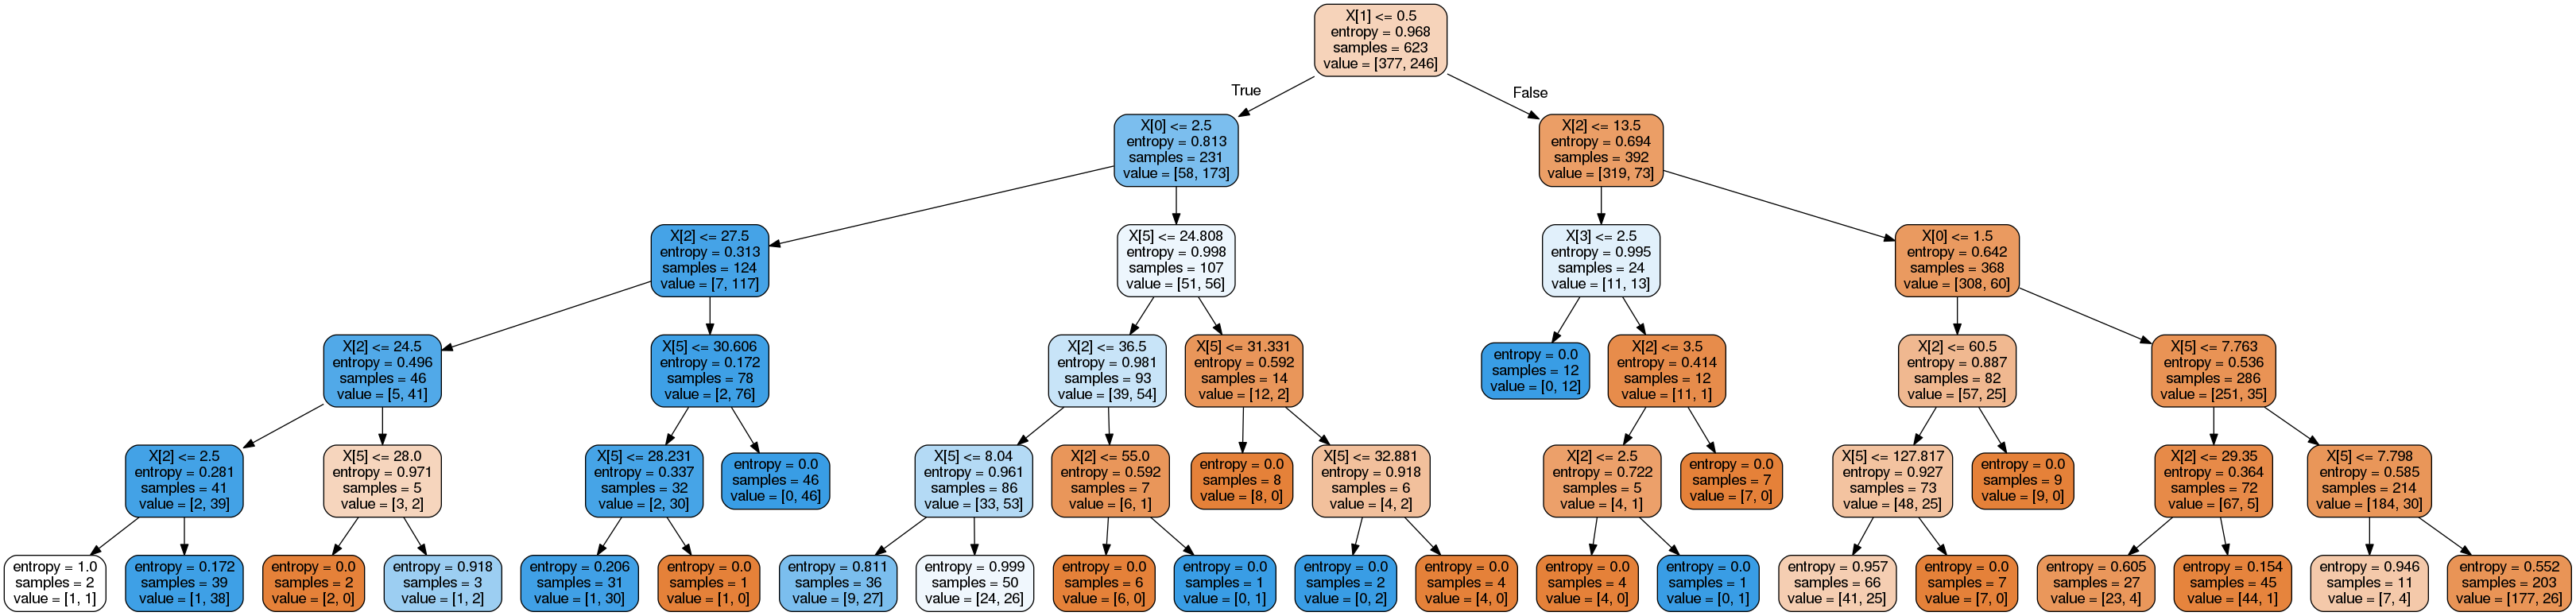

In [28]:
dot_data=StringIO()
export_graphviz(sk_tree,out_file=dot_data,filled=True,rounded=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## Random Forest Implementation

In [29]:
X_train=train_data[input_cols]
Y_train=np.array(train_data[output_cols]).reshape((-1,))
X_test=test_data[input_cols]
Y_test=np.array(test_data[output_cols]).reshape((-1,))

In [33]:
sk_tree=DecisionTreeClassifier(criterion='entropy')
sk_tree.fit(X_train,Y_train)
sk_tree.score(X_train,Y_train)

0.9823434991974318

In [34]:
sk_tree.score(X_test,Y_test)

0.7761194029850746

- Huge difference between training and testing score in decision trees on not giving any depth
- ON max_depth=5 train_score=84%,test_score=82%

In [37]:
#Random Forest
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=10,criterion="entropy")
rf.fit(X_train,Y_train)
print("train score:",rf.score(X_train,Y_train))
print("test score:",rf.score(X_test,Y_test))

train score: 0.9582664526484751
test score: 0.8208955223880597


In [38]:
rf=RandomForestClassifier(n_estimators=10,criterion="entropy",max_depth=5)
rf.fit(X_train,Y_train)
print("train score:",rf.score(X_train,Y_train))
print("test score:",rf.score(X_test,Y_test))

train score: 0.8587479935794543
test score: 0.8432835820895522


In [40]:
#cross_val_score
acc=cross_val_score(RandomForestClassifier(n_estimators=10,max_depth=5,criterion="entropy"),X_train,Y_train,cv=5).mean()
print(acc)

0.7930521249359959


In [41]:
acc_list=[]
for i in range(1,50):
    acc=cross_val_score(RandomForestClassifier(n_estimators=i,max_depth=5,criterion="entropy"),X_train,Y_train,cv=5).mean()
    acc_list.append(acc)
print(acc_list)    

[0.7544454685099846, 0.7833618023553508, 0.7754644137224782, 0.7963670250896058, 0.7946128008192523, 0.8090011264720942, 0.7899037378392217, 0.8075037378392217, 0.7803408090117767, 0.7994779313876088, 0.8203043522785458, 0.8010652329749103, 0.8138910394265233, 0.7914637992831542, 0.8154654377880185, 0.8121626216077831, 0.8076188428059397, 0.7947797235023042, 0.8106652329749103, 0.8171295442908345, 0.8122142345110086, 0.8267557603686635, 0.8203553507424475, 0.8154531490015362, 0.8187039426523297, 0.8155166410650281, 0.8108063492063492, 0.8186527393753199, 0.8235555555555555, 0.813942652329749, 0.807516231438812, 0.8108188428059396, 0.8186783410138249, 0.8106779313876087, 0.8138525345622121, 0.8186783410138249, 0.8107039426523297, 0.8138398361495135, 0.8251174603174602, 0.8218273425499232, 0.8187170506912442, 0.823478955453149, 0.825053149001536, 0.8138656426011265, 0.8107037378392217, 0.8186658474142344, 0.8139039426523297, 0.8315305683563748, 0.8154273425499232]


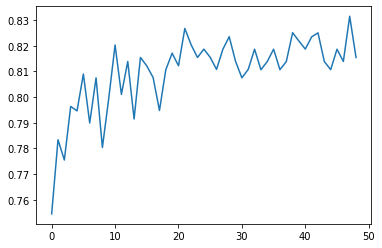

In [43]:
import matplotlib.pyplot as plt
plt.plot(acc_list)
plt.show()

In [44]:
print(np.argmax(acc_list))

47


In [45]:
rf=RandomForestClassifier(n_estimators=48,criterion="entropy",max_depth=5)
rf.fit(X_train,Y_train)
print("train score:",rf.score(X_train,Y_train))
print("test score:",rf.score(X_test,Y_test))

train score: 0.8571428571428571
test score: 0.8395522388059702
